# Erzeugung von Plots

Dieses Notebook dient nur zu Ihrer Information. In diesem Notebook werden Plots von Potenzfunktionen erzeugt und beschriftet.

In [1]:
from sympy import *
init_printing()

from matplotlib import pyplot as plt, ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina' # nur MacBook Pro

from fun_expr import Function_from_Expression as FE

In [2]:
x,kappa = symbols('x,kappa')

f = FE((x,kappa), x**kappa,name='f')
f.equation()

<IPython.core.display.Math object>

Sollen Anmerkungen gedreht werden, so führen die ungleichen Maßstäbe für die `x`- und die `y`-Achse zu falschen Winkeln. Auf StackOverflow ist eine Lösung für dieses Problem angegeben worden:

In [3]:
# Stackoverflow
# https://stackoverflow.com/questions/19907140
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms


class RotationAwareAnnotation(mtext.Annotation):
    def __init__(self, s, xy, p, pa=None, ax=None, **kwargs):
        self.ax = ax or plt.gca()
        self.p = p
        if not pa:
            self.pa = xy
        self.calc_angle_data()
        kwargs.update(rotation_mode=kwargs.get("rotation_mode", "anchor"))
        mtext.Annotation.__init__(self, s, xy, **kwargs)
        self.set_transform(mtransforms.IdentityTransform())
        if 'clip_on' in kwargs:
            self.set_clip_path(self.ax.patch)
        self.ax._add_text(self)

    def calc_angle_data(self):
        ang = np.arctan2(self.p[1]-self.pa[1], self.p[0]-self.pa[0])
        self.angle_data = np.rad2deg(ang)

    def _get_rotation(self):
        return self.ax.transData.transform_angles(np.array((self.angle_data,)), 
                            np.array([self.pa[0], self.pa[1]]).reshape((1, 2)))[0]

    def _set_rotation(self, rotation):
        pass

    _rotation = property(_get_rotation, _set_rotation)

Verschiedene Werte für $\kappa$, um die Bandbreite der Potenzfunktionen zu verdeutlichen:

In [4]:
k_values = [3,2,1.5,1.2,1,1/1.2,2/3,1/2,1/3]

Darstellung der Potenzfunktionen $y=x^\kappa$ im Intervall $0\le x \le 10$:

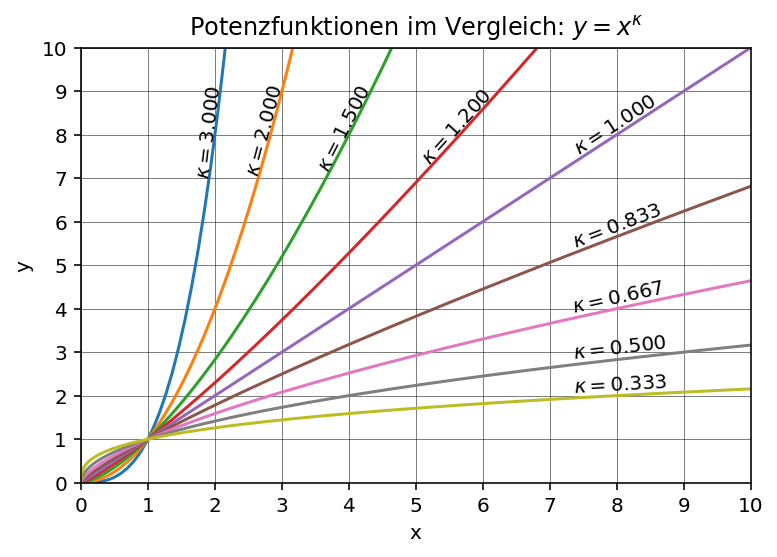

In [5]:
fig, ax = plt.subplots()

lx = np.array([
    np.linspace(0,0.5,100,endpoint=False),
    np.linspace(0.5,10,100)
]).flatten()

x_values = sorted([8**(1/k) for k in k_values[:4]] + [8 for k in k_values[4:]])

for x,k in zip(x_values,k_values):
    ax.plot(lx, f.lambdified(lx,k),label=fr'$y=x^{{{k:1.3f}}}$')
    ra = RotationAwareAnnotation(
        f"$\kappa = {k:1.3f}$",
        xy=(float(x),float(f(x,k))),
        p=(float(x+0.10),float(f(x+0.10,k))),
        ax=ax,
        xytext=(2,1),
        textcoords="offset points",
        va='bottom', ha='center'
    )
    
ax.grid(lw=0.25,c='k')
ax.set(
    xlim=(0,10),ylim=(0,10),
    xlabel='x', ylabel='y',
    title='Potenzfunktionen im Vergleich: $y = x^\kappa$',
)

ax.xaxis.set_major_locator(tk.MultipleLocator(1))
ax.yaxis.set_major_locator(tk.MultipleLocator(1))

plt.savefig('Potenzfunktionen_Vergleich.pdf',bbox_inches='tight')
plt.show()

**Doppelt logarithmische Darstellung**

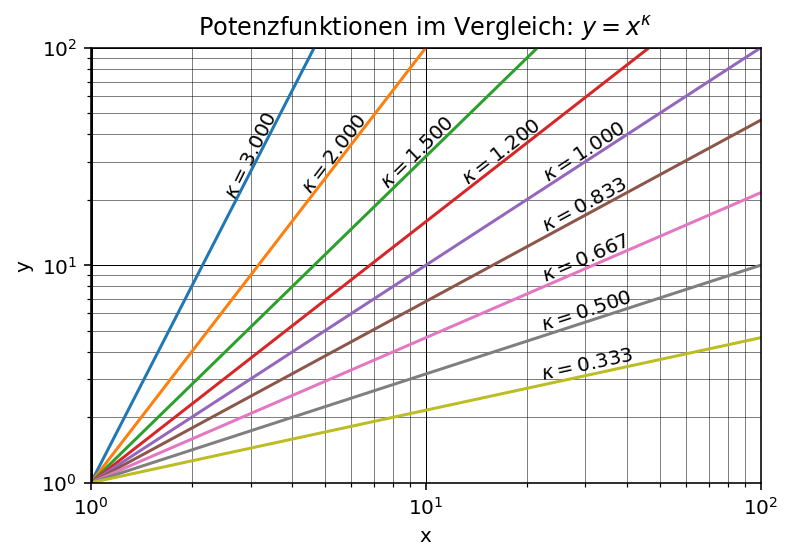

In [6]:
fig, ax = plt.subplots()

lx = np.linspace(1,100,2)

x_values = [30**(1/k) for k in k_values[:4]] + [30 for k in k_values[4:]]

for x,k in zip(x_values,k_values):
    ax.plot(lx, f.lambdified(lx,k),label=fr'$y=x^{{{k:1.3f}}}$')
    ra = RotationAwareAnnotation(
        f"$\kappa = {k:1.3f}$",
        xy=(float(x),float(f(x,k))),
        p=(float(x+0.10),float(f(x+0.10,k))),
        ax=ax,
        xytext=(2,1),
        textcoords="offset points",
        va='bottom', ha='center'
    )

ax.set_yscale('log')
ax.set_xscale('log')
ax.axvline(1,c='k')
ax.grid(lw=0.25,c='k')
ax.set(
    xlim=(1,100),ylim=(1,100),
    xlabel='x', ylabel='y',
    title='Potenzfunktionen im Vergleich: $y = x^\kappa$',
)
ax.grid(which='major',c='k',lw=0.5)
ax.grid(which='minor',c='k',lw=0.25)

plt.savefig('Potenzfunktionen_loglog.pdf',bbox_inches='tight')
plt.show()